In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [28]:

codedir = '/'.join(os.getcwd().split("/")[:-1])

pipe_res = os.path.join(codedir,"pipe")
chan_res = os.path.join(codedir,"channel")
bl_res   = os.path.join(codedir,"bl")
turbmodels = ['SA','VF','SST','MK']

In [29]:
dfs_pipe = [ pd.read_fwf(os.path.join(pipe_res,'Inflow_'+t+'.csv')) for t in turbmodels]
dfs_chan = [ pd.read_fwf(os.path.join(chan_res,'Inflow_'+t+'.csv')) for t in turbmodels]
dfs_bl   = [ pd.read_fwf(os.path.join(bl_res  ,'Inflow_'+t+'.csv')) for t in turbmodels]
    

Text(0, 0.5, 'r')

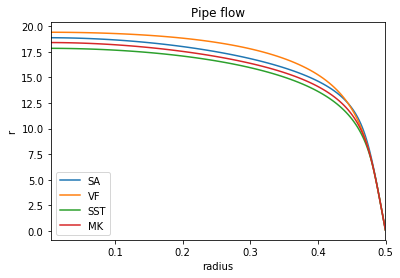

In [43]:
fig,ax =plt.subplots()
for i,df in enumerate(dfs_pipe):
    df.plot('y','w',ax=ax, label=turbmodels[i])
ax.set_title('Pipe flow')
ax.set_xlabel("radius")
ax.set_ylabel("r")

Text(0, 0.5, 'w')

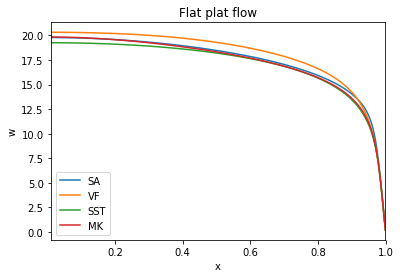

In [44]:
fig,ax =plt.subplots()
for i,df in enumerate(dfs_bl):
    df.plot('y','w',ax=ax, label=turbmodels[i])
ax.set_title('Flat plat flow')
ax.set_xlabel("x")
ax.set_ylabel("w")

Text(0, 0.5, 'w')

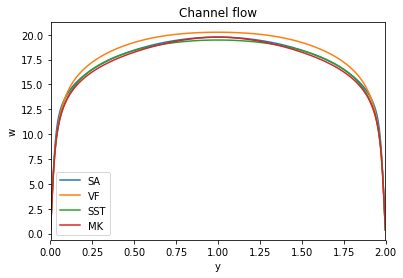

In [47]:
fig,ax =plt.subplots()
for i,df in enumerate(dfs_chan):
    df.plot('y','w',ax=ax, label=turbmodels[i])
ax.set_title("Channel flow")
ax.set_xlabel('y')
ax.set_ylabel('w')
              